<a href="https://colab.research.google.com/github/sharanya9705/structanalysis/blob/main/Dataset%20collection/plotting.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
from google.colab import files
uploaded = files.upload()
import os
print(os.listdir())

import pandas as pd

file_path = 'soil erosion dataset (1).xlsx'  # Update if necessary
df = pd.read_excel(file_path)

# Show the first few rows of the dataset
df.head()


Saving soil erosion dataset (1).xlsx to soil erosion dataset (1) (1).xlsx
['.config', 'soil erosion dataset (1).xlsx', 'soil erosion dataset (1) (1).xlsx', 'sample_data']


,Latitude,Longitude,Region,Rainfall (mm),Soil Type,Vegetation Cover(%),Erosion rate (t/ha/year),Land Use Type
0,"13°23'22""N","74°19'14""E",Udupi,3000,Loamy,45,12,Agriculture
1,"13°37'26""N","74°33'11""E",Kundapura,4000,Red Lateritic,40,12,"Agriculture, Urban settlements"
2,"14°02'37""N","74°15'43""E",Bhatkal,3200,Lateritic,45,14,"Forested area,Agriculture"
3,"14°04'21""N","74°23'25""E",Murdeshwar,3200,Lateritic,40,13,Agriculture
4,"14°16'06""N","14°16'06""N",Honnavar,3500,Lateritic,40,12,"Agriculture,Forested area"


In [5]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [8]:
file_path = '/content/drive/My Drive/datasets/soil erosion dataset (1).xlsx'


In [10]:
import pandas as pd
file_path = '/content/drive/My Drive/soil erosion dataset (1).xlsx'
df = pd.read_excel(file_path)
#print(df.head())
from sklearn.preprocessing import LabelEncoder

label_encoders = {}
categorical_columns = ['Region', 'Soil Type', 'Land Use Type']

for col in categorical_columns:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    label_encoders[col] = le
df['Latitude'] = df['Latitude'].str.extract(r'([\d\.]+)').astype(float)
df['Longitude'] = df['Longitude'].str.extract(r'([\d\.]+)').astype(float)
X = df.drop(columns=['Erosion rate (t/ha/year)'])
y = df['Erosion rate (t/ha/year)']
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


from sklearn.ensemble import RandomForestRegressor

model = RandomForestRegressor(random_state=42)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
from sklearn.metrics import mean_squared_error
import numpy as np

rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print(f"RMSE: {rmse}")

from sklearn.model_selection import GridSearchCV

param_grid = {
    'n_estimators': [50, 100, 150],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=3, scoring='neg_mean_squared_error', verbose=2, n_jobs=-1)
grid_search.fit(X_train, y_train)

best_model = grid_search.best_estimator_

importances = model.feature_importances_
for feature, importance in zip(X.columns, importances):
    print(f"{feature}: {importance:.4f}")


from sklearn.model_selection import GridSearchCV

param_grid = {
    'n_estimators': [50, 100, 150],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=3, scoring='neg_mean_squared_error', verbose=2, n_jobs=-1)
grid_search.fit(X_train, y_train)

best_model = grid_search.best_estimator_
importances = model.feature_importances_
for feature, importance in zip(X.columns, importances):
    print(f"{feature}: {importance:.4f}")



RMSE: 0.9667040222667258
Fitting 3 folds for each of 108 candidates, totalling 324 fits
Latitude: 0.0503
Longitude: 0.0316
Region: 0.2538
Rainfall (mm): 0.0699
Soil Type: 0.1267
Vegetation Cover(%): 0.1902
Land Use Type: 0.2775
Fitting 3 folds for each of 108 candidates, totalling 324 fits
Latitude: 0.0503
Longitude: 0.0316
Region: 0.2538
Rainfall (mm): 0.0699
Soil Type: 0.1267
Vegetation Cover(%): 0.1902
Land Use Type: 0.2775


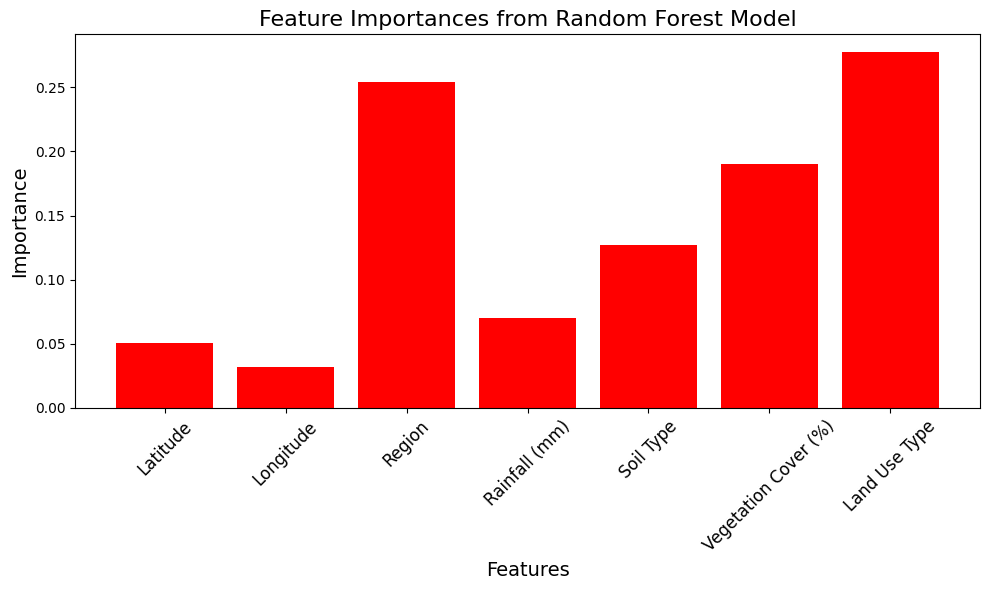

In [11]:
# Data for feature importances (as extracted from the provided output)
importances = [0.0503, 0.0316, 0.2538, 0.0699, 0.1267, 0.1902, 0.2775]
features = [
    "Latitude",
    "Longitude",
    "Region",
    "Rainfall (mm)",
    "Soil Type",
    "Vegetation Cover (%)",
    "Land Use Type",
]

# Plot feature importances as a bar chart
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.bar(features, importances, color='red')
plt.xlabel('Features', fontsize=14)
plt.ylabel('Importance', fontsize=14)
plt.title('Feature Importances from Random Forest Model', fontsize=16)
plt.xticks(rotation=45, fontsize=12)
plt.tight_layout()
plt.show()
